In [0]:
from google.colab import files

uploaded = files.upload()

Saving TestData.csv to TestData.csv
Saving TrainData.csv to TrainData.csv
Saving ValData.csv to ValData.csv


In [0]:
# data analysis for MUSIC data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import savetxt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 9

# extra added for using inbuilt sigmoid

from scipy.special import expit

In [0]:
op_cases = 10
train_df = pd.read_csv("TrainData.csv")
data_t = train_df.to_numpy()
x_train = data_t[:,0:29]
y_train = data_t[:,29:39]

val_df = pd.read_csv("ValData.csv")
data_v = val_df.to_numpy()
x_val = data_v[:,0:29]
y_val = data_v[:,29:39]

test_df = pd.read_csv("TestData.csv")
data_te = test_df.to_numpy()
x_test = data_te[:,0:29]
y_test = data_te[:,29:39]

In [0]:
#cost function for logistic regression
def costFunction(X,y,theta,lam):
    m=X.shape[0]
    prod=np.zeros((X.shape[0],theta.shape[1]))
    
    prod=X.dot(theta)
    #print(prod)
    h=1/(1+np.exp(-prod))
    J = (-1/m)*np.sum( y*np.log(h +1e-20) + (1-y)*np.log(1-h +1e-20)) + (lam/(2*m))*((np.sum(theta))-np.sum(theta[0,:]));
    return [J,h]

In [0]:
# gradient descent algorithm
def grad_descent_vec(X,y,theta,lam,max_itr,alpha):
    m=X.shape[0]
    J_hist=np.zeros((max_itr,1))
    for i in range(max_itr):
        [J,h]=costFunction(X,y,theta,lam)
        dif = h-y
        theta = theta - (alpha/m)*((X.T).dot(dif))
        J_hist[i]=J
    return [theta,J_hist]

In [0]:
def learning_curve(xT,xV,yT,yV,theta,lam):
    ma=yV.shape[0]
    J_t_error = np.zeros((ma-1,1))
    J_v_error = np.zeros((ma-1,1))
    for i in range(2,ma+1):
        [J_t_error[i-2],h] = costFunction(xT[0:i-1,:], yT[0:i-1,:], theta, lam)
        [J_v_error[i-2],h] = costFunction(xV[0:i-1,:], yV[0:i-1,:], theta, lam)
    i=np.arange(1,ma,1)
    #print(J_t_error,J_v_error)
    plt.plot(i,J_t_error,label='Train Error')
    plt.plot(i,J_v_error,label='Validation Error')
    plt.legend(loc='upper left')
    plt.title('learning curve')
    plt.show()

In [0]:
# the function to find degree for best results. 
def lc_degree(d_max,xT,xV,yT,yV,lam,max_itr,alpha,col):
    power=1
    alpha =1.2
    max_itr = 1000
    ma=yV.shape[0]
    J_t_error = np.zeros((d_max,1))
    J_v_error = np.zeros((d_max,1))
    for i in range(d_max):
        initial_theta = np.ones((xT.shape[1],yT.shape[1]))
        [theta,j_hist] = grad_descent_vec(xT, yT, initial_theta,lam, max_itr, alpha)    
        [J_t_error[i],h] = costFunction(xT[0:ma,:], yT[0:ma,:], theta, lam)
        [J_v_error[i],h] = costFunction(xV, yV, theta, lam)
        fact = normalise_fact( np.append(np.power(xT,i+1) , np.power(xV,i+1),axis=0) )
        #fact=1
        powT = (np.power(xT,i+1))/fact
        powV = (np.power(xV,i+1))/fact
        xT = np.append(xT, powT,axis=1)
        xV = np.append(xV, powV,axis=1)
        j=np.arange(1,1001,1)
        plt.plot(j,j_hist)
        plt.show()
        #xT = np.power(xT,i+1) / fact
        #xV = np.power(xV,i+1) / fact
        print(j_hist[980:1000])
    power = np.argmin(J_v_error)
    i=np.arange(1,d_max+1,1)
    plt.plot(i,J_t_error,label='Train Error')
    plt.plot(i,J_v_error,label='Validation Error')
    plt.legend(loc='upper left')
    plt.title(col)
    plt.show()
    return power

def normalise_fact(x):
    Max = np.max(x)
    Min = np.min(x)
    fact = (Max-Min)
    return fact

In [0]:
def prediction(h,y):
    h_out=np.zeros((h.shape[0],h.shape[1]))
    add=0
    for i in range(h.shape[0]):
        result = np.where(h[i:i+1,:] == np.amax(h[i:i+1,:],axis=1))
        list_of_cordinates= list(zip(result[0],result[1]))
        #print(list_of_cordinates)
        cord = list_of_cordinates[0][1]
        h_out[i:i+1,cord]=1
        if np.all(h_out[i:i+1,:]==y[i:i+1,:]):
            add=add+1

    accuracy = add / h.shape[0] *100
    return [h_out,accuracy]

In [0]:
max_itr = 200
alpha = .00001
lam=0

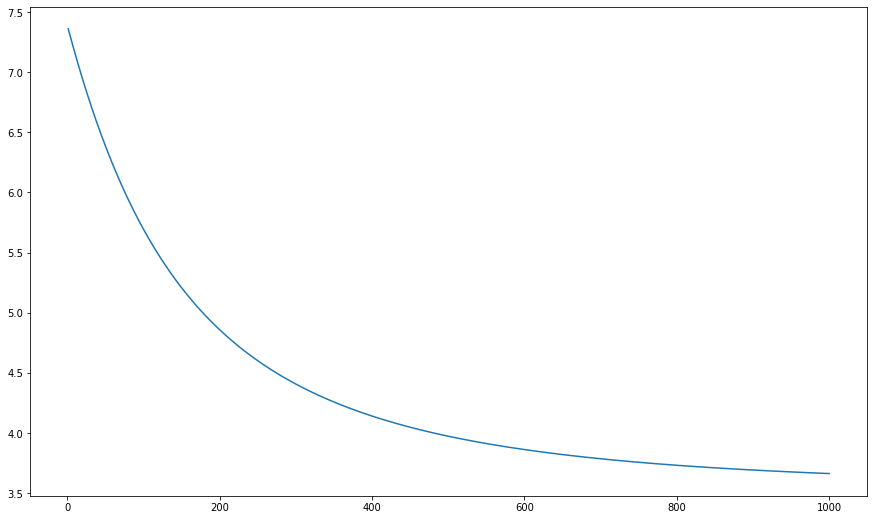

[[3.66766534]
 [3.66739883]
 [3.66713308]
 [3.66686809]
 [3.66660384]
 [3.66634034]
 [3.66607759]
 [3.66581558]
 [3.66555432]
 [3.66529379]
 [3.66503399]
 [3.66477493]
 [3.6645166 ]
 [3.664259  ]
 [3.66400212]
 [3.66374597]
 [3.66349054]
 [3.66323583]
 [3.66298183]
 [3.66272855]]


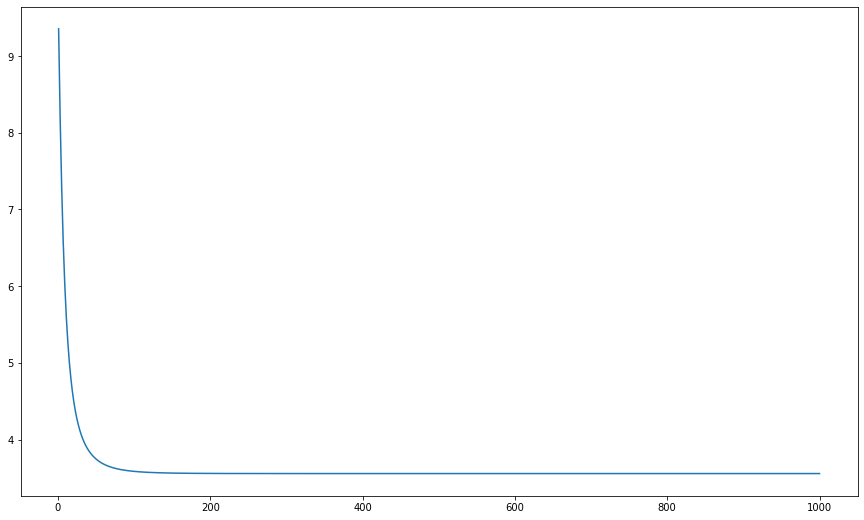

[[3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]
 [3.55698324]]


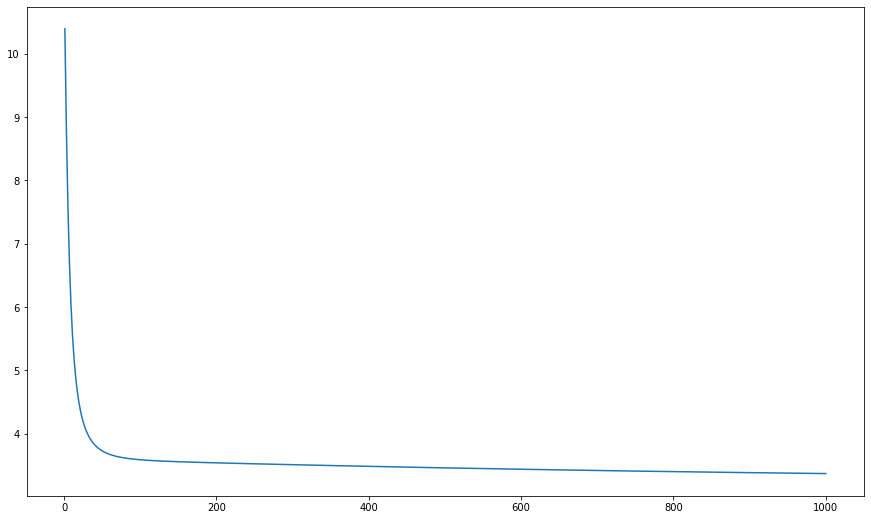

[[3.37268876]
 [3.37255012]
 [3.37241163]
 [3.37227329]
 [3.37213511]
 [3.37199708]
 [3.3718592 ]
 [3.37172148]
 [3.37158391]
 [3.37144649]
 [3.37130922]
 [3.37117211]
 [3.37103515]
 [3.37089834]
 [3.37076168]
 [3.37062518]
 [3.37048882]
 [3.37035262]
 [3.37021657]
 [3.37008067]]


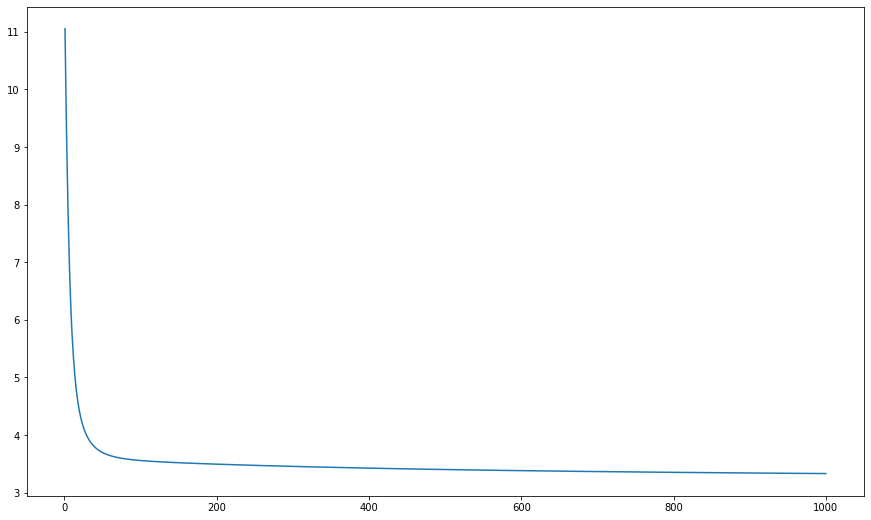

[[3.335329  ]
 [3.33523599]
 [3.33514312]
 [3.33505037]
 [3.33495775]
 [3.33486526]
 [3.3347729 ]
 [3.33468067]
 [3.33458857]
 [3.3344966 ]
 [3.33440475]
 [3.33431304]
 [3.33422145]
 [3.33412999]
 [3.33403865]
 [3.33394745]
 [3.33385637]
 [3.33376541]
 [3.33367459]
 [3.33358389]]


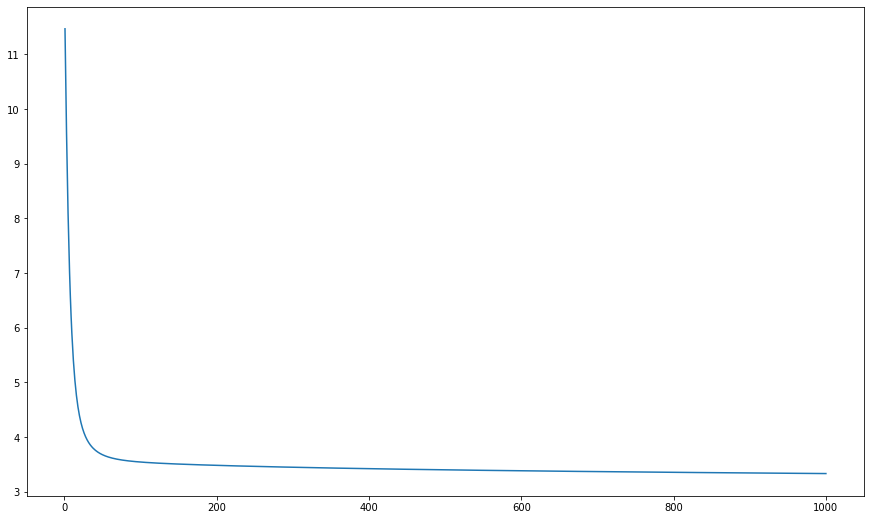

[[3.33227973]
 [3.33217451]
 [3.33206938]
 [3.33196433]
 [3.33185937]
 [3.33175449]
 [3.33164969]
 [3.33154498]
 [3.33144035]
 [3.3313358 ]
 [3.33123133]
 [3.33112695]
 [3.33102265]
 [3.33091843]
 [3.3308143 ]
 [3.33071024]
 [3.33060627]
 [3.33050238]
 [3.33039857]
 [3.33029484]]


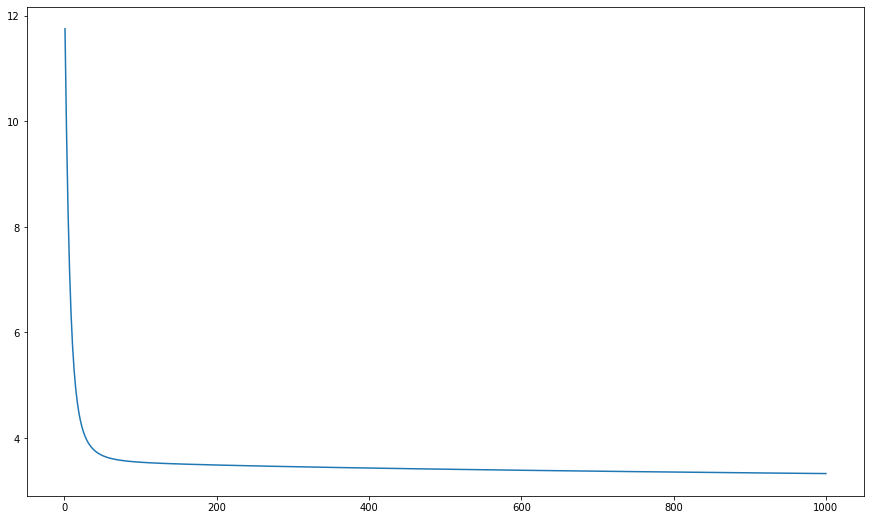

[[3.32870591]
 [3.32857331]
 [3.32844084]
 [3.32830848]
 [3.32817624]
 [3.32804412]
 [3.32791211]
 [3.32778022]
 [3.32764844]
 [3.32751678]
 [3.32738524]
 [3.32725381]
 [3.3271225 ]
 [3.32699131]
 [3.32686023]
 [3.32672926]
 [3.32659842]
 [3.32646768]
 [3.32633707]
 [3.32620657]]


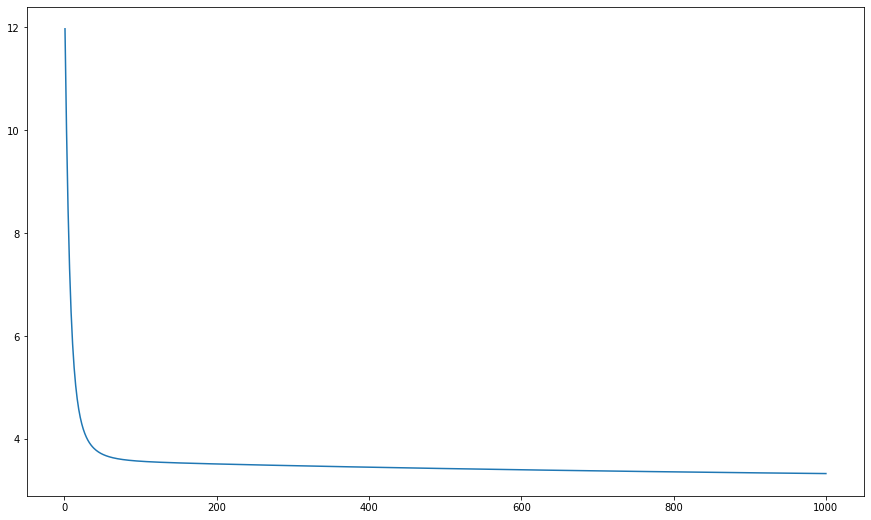

[[3.32444637]
 [3.32429822]
 [3.32415024]
 [3.32400244]
 [3.32385481]
 [3.32370736]
 [3.32356008]
 [3.32341298]
 [3.32326605]
 [3.3231193 ]
 [3.32297272]
 [3.32282632]
 [3.32268009]
 [3.32253403]
 [3.32238814]
 [3.32224243]
 [3.32209689]
 [3.32195152]
 [3.32180633]
 [3.32166131]]


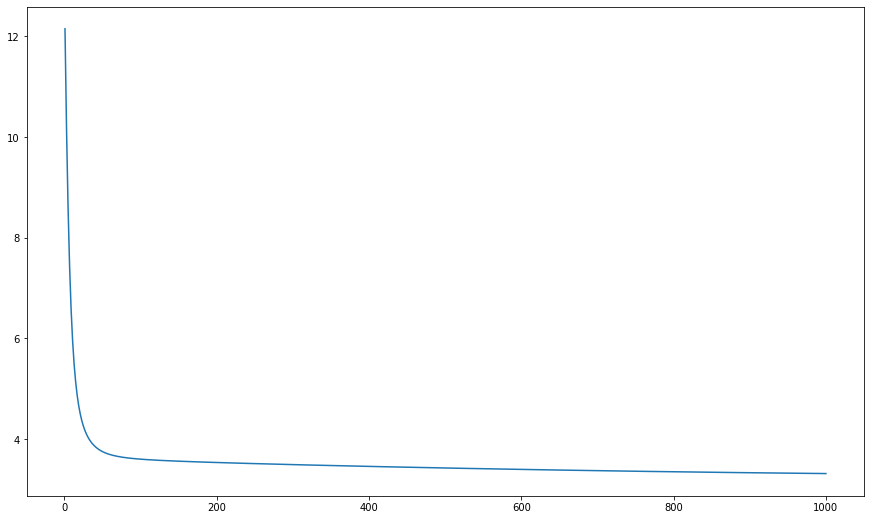

[[3.32111725]
 [3.32095922]
 [3.3208014 ]
 [3.32064379]
 [3.32048639]
 [3.3203292 ]
 [3.32017223]
 [3.32001546]
 [3.3198589 ]
 [3.31970255]
 [3.31954641]
 [3.31939048]
 [3.31923476]
 [3.31907924]
 [3.31892393]
 [3.31876883]
 [3.31861394]
 [3.31845925]
 [3.31830476]
 [3.31815049]]


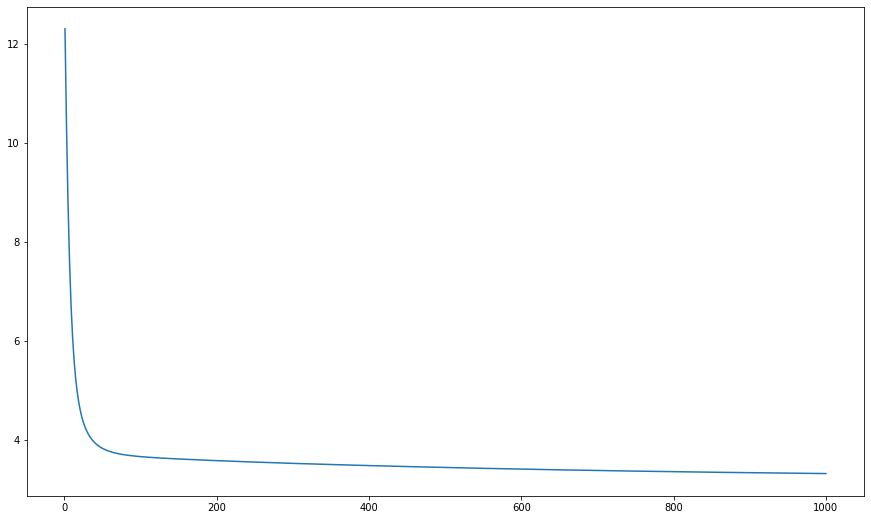

[[3.31857225]
 [3.31840582]
 [3.31823963]
 [3.31807368]
 [3.31790797]
 [3.3177425 ]
 [3.31757728]
 [3.31741229]
 [3.31724753]
 [3.31708302]
 [3.31691875]
 [3.31675471]
 [3.3165909 ]
 [3.31642734]
 [3.31626401]
 [3.31610091]
 [3.31593805]
 [3.31577542]
 [3.31561303]
 [3.31545087]]


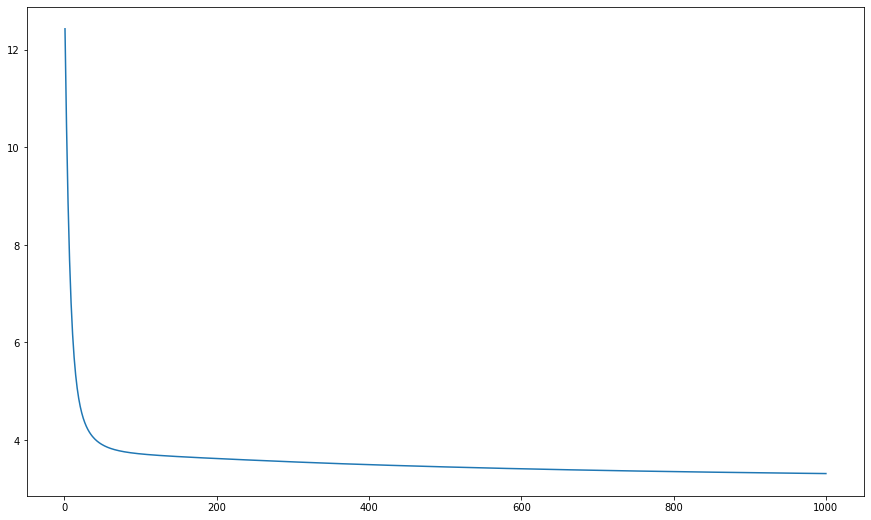

[[3.31675979]
 [3.31658567]
 [3.31641182]
 [3.31623825]
 [3.31606494]
 [3.3158919 ]
 [3.31571912]
 [3.31554662]
 [3.31537438]
 [3.31520241]
 [3.3150307 ]
 [3.31485926]
 [3.31468809]
 [3.31451718]
 [3.31434653]
 [3.31417614]
 [3.31400602]
 [3.31383616]
 [3.31366656]
 [3.31349722]]


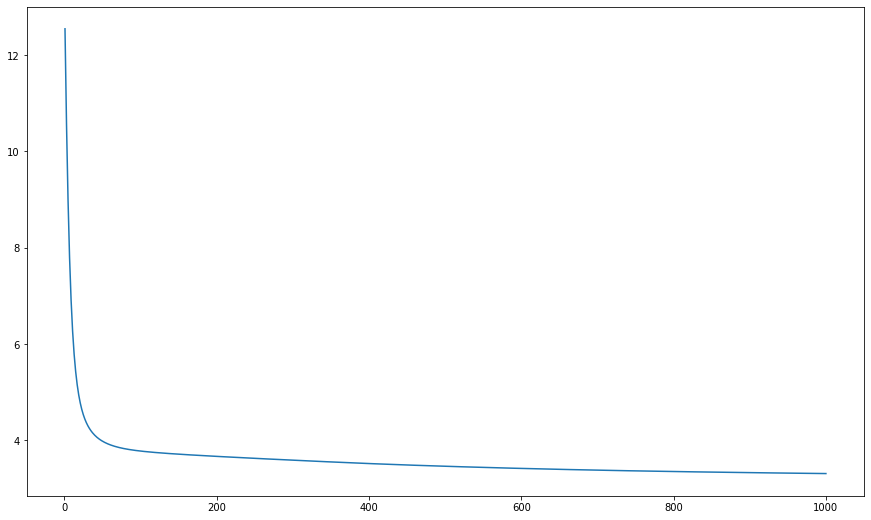

[[3.31572459]
 [3.3155431 ]
 [3.31536192]
 [3.31518103]
 [3.31500045]
 [3.31482016]
 [3.31464018]
 [3.31446049]
 [3.3142811 ]
 [3.31410201]
 [3.31392321]
 [3.3137447 ]
 [3.3135665 ]
 [3.31338858]
 [3.31321096]
 [3.31303363]
 [3.31285659]
 [3.31267984]
 [3.31250338]
 [3.31232721]]


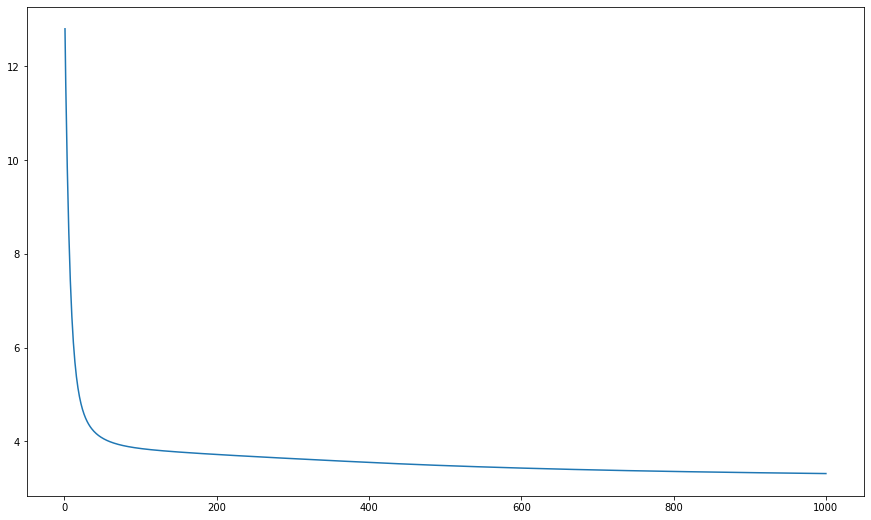

[[3.31548918]
 [3.31530026]
 [3.31511168]
 [3.31492344]
 [3.31473554]
 [3.31454797]
 [3.31436073]
 [3.31417383]
 [3.31398726]
 [3.31380102]
 [3.31361511]
 [3.31342953]
 [3.31324428]
 [3.31305935]
 [3.31287475]
 [3.31269048]
 [3.31250653]
 [3.3123229 ]
 [3.3121396 ]
 [3.31195662]]


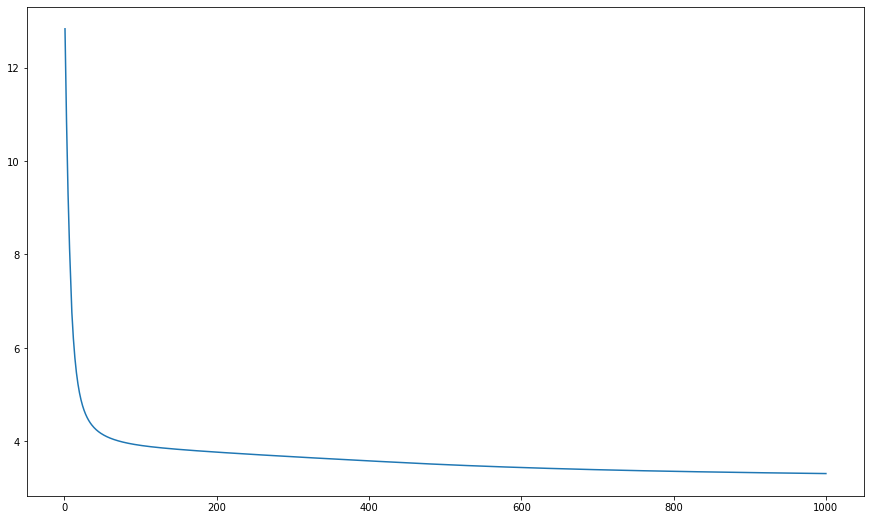

[[3.31602964]
 [3.31583274]
 [3.31563623]
 [3.31544009]
 [3.31524435]
 [3.31504898]
 [3.314854  ]
 [3.31465939]
 [3.31446516]
 [3.31427131]
 [3.31407783]
 [3.31388473]
 [3.313692  ]
 [3.31349964]
 [3.31330764]
 [3.31311602]
 [3.31292476]
 [3.31273387]
 [3.31254334]
 [3.31235317]]


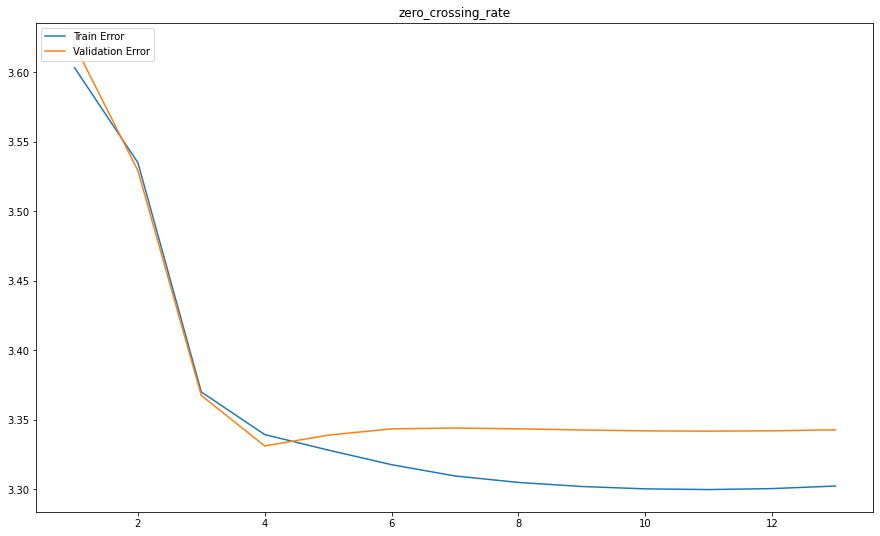

In [167]:
# to check the best degree for all features

#alpha_vals = [ .00002 , 0.00005, .07, .1, .0000008, ]

columns = ['x0',	'tempo',	'beats',	'chroma_stft',	'rmse',	'spectral_centroid',	'spectral_bandwidth',	'rolloff',	'zero_crossing_rate',	'mfcc1',	'mfcc2',	'mfcc3',	'mfcc4',	'mfcc5',	'mfcc6',	'mfcc7',	'mfcc8',	'mfcc9',	'mfcc10',	'mfcc11',	'mfcc12',	'mfcc13',	'mfcc14',	'mfcc15',	'mfcc16',	'mfcc17',	'mfcc18',	'mfcc19',	'mfcc20']
power = [None] * len(columns)
d_max=13
#print(x_train[:,2:3])
# range(0,28)
for i in range(7,8):
    #print(x_train[:,i+1:i+2])
    power[i]=lc_degree(d_max, x_train[:,i+1:i+2], x_val[:,i+1:i+2], y_train, y_val, lam, max_itr, alpha,columns[i+1])

In [0]:
print(power)

[6, 6, 6, 5, 0, 6, 6, 6, 1, 6, 1, 6, 1, 7, 1, 5, 1, 6, 1, 6, 1, 6, 1, 5, 1, 6, 1, 1, None]


In [0]:
print(power)

[6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 1, 6, 1, 7, 1, 5, 1, 6, 1, 6, 1, 6, 1, 5, 1, 6, 1, 1, None]


In [0]:
initial_theta= np.ones((x_train.shape[1],y_train.shape[1])) 
[J,h]=costFunction(x_train, y_train, initial_theta,0)
#[J,h]=cost(x_train, y_train, initial_theta,0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


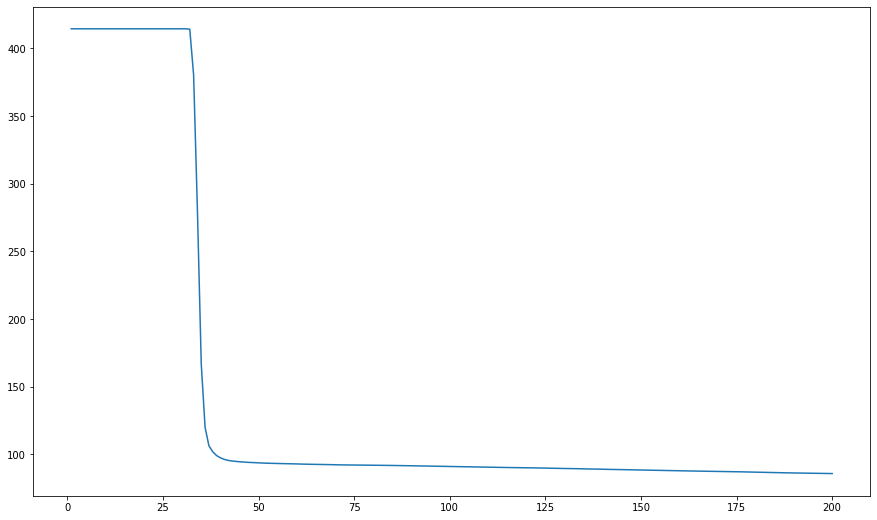

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


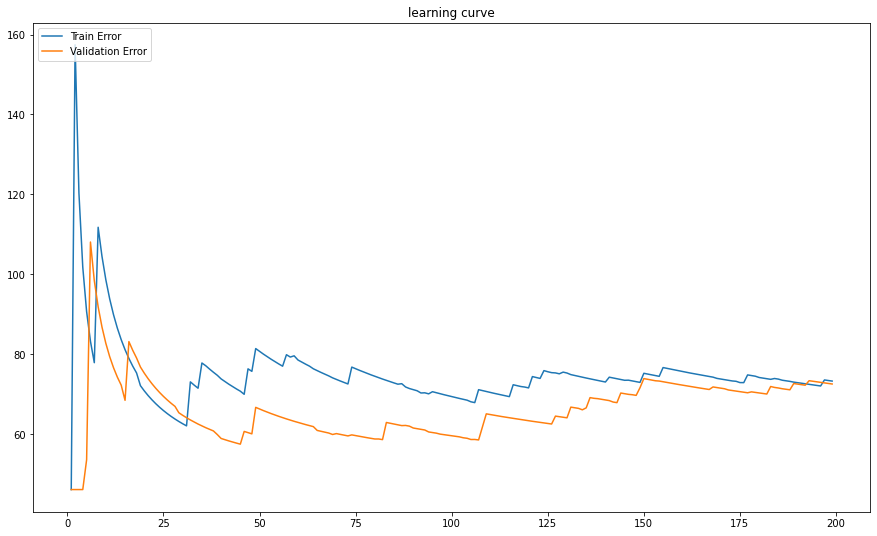

In [0]:
[theta,j_hist] = grad_descent_vec(x_train, y_train, initial_theta,0, max_itr, alpha)

i=np.arange(1,201,1)
plt.plot(i,j_hist)
plt.show()

learning_curve(x_train, x_val, y_train, y_val, theta, lam)

In [0]:
[J,h_train]=costFunction(x_train, y_train, theta,0)

h_train,acc=prediction(h_train,y_train)
print("\naccuracy (train):  ",acc)

[J,h_test]=costFunction(x_test, y_test, theta,0)

h_test,acc=prediction(h_test,y_test)
print("\naccuracy:  ",acc)


accuracy (train):   11.166666666666666

accuracy:   11.5


In [0]:
print(theta)

[[ 0.19993595  0.19994059  0.19993322  0.19992624  0.19992753  0.19993391
   0.19992799  0.19992183  0.19993067  0.19993036]
 [ 0.19216556  0.19286462  0.19165428  0.19091552  0.19095167  0.19180979
   0.19126563  0.19016454  0.19166627  0.19141   ]
 [ 0.19627414  0.19651398  0.19603665  0.19569455  0.19570695  0.19609642
   0.19585823  0.19533017  0.19605722  0.19592585]
 [ 0.19997567  0.19997558  0.19997489  0.19997373  0.19997491  0.19997429
   0.19997561  0.19997169  0.19997537  0.19997463]
 [ 0.19999198  0.1999906   0.19999149  0.19999074  0.19999161  0.19999078
   0.1999912   0.19999123  0.19999105  0.19999096]
 [ 0.06493935  0.06679141  0.06529897  0.06683287  0.06652963  0.06479568
   0.06999786  0.06553458  0.06565464  0.06641971]
 [ 0.06063814  0.06222026  0.05928416  0.05400644  0.05544889  0.05958696
   0.05203092  0.05351988  0.05842026  0.05686712]
 [-0.07589964 -0.08063358 -0.07597842 -0.07109576 -0.07189027 -0.07628755
  -0.0717879  -0.06948541 -0.07400372 -0.07306843]
